In [ ]:
#Question 7
#Implement a function to compute Kulczynski measure for a given dataframe
#of frequent itemsets and a strong association rule.
#Using the same example as given in lab tutorial.

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Function to calculate Kulczynski measure for rule A => B.
#   kulc(A=>B) = [ confidence(A=>B) + confidence(B=>A) ] / 2.
#
#   and, confidence(A=>B) = P(B|A) = support(A U B) / support(A)

def calc_kulc(frequent_itemsets,A,B):
  idxA = frequent_itemsets[frequent_itemsets['itemsets'] == A].index.values
  sup_A = frequent_itemsets.loc[idxA,'support'].values
  idxB = frequent_itemsets[frequent_itemsets['itemsets'] == B].index.values
  sup_B = frequent_itemsets.loc[idxB,'support'].values
  idxAB = frequent_itemsets[frequent_itemsets['itemsets'] == A.union(B)].index.values
  sup_AB = frequent_itemsets.loc[idxAB,'support'].values
  result = ((sup_AB/sup_A) + (sup_AB/sup_B))/2
  return float(result)

dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
#find frequent itemsets using Apriori algorithm.
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
display(frequent_itemsets)

strong_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
#ignoring lift leverage conviction as not in scope
strong_rules.drop(['lift','leverage','conviction'],axis=1,inplace=True)
display(strong_rules)

#We can calculate Kulczynski measure for Eggs => KidneyBeans as we now know that it is a strong association rule.
antecedent = frozenset({'Eggs'})
consequent = frozenset({'Kidney Beans'})
print('Kulczynski measure for {Eggs} => {Kidney Beans} = %.2f' %calc_kulc(frequent_itemsets, antecedent, consequent))

In [ ]:
#Question 8.
#Function to calculate imbalance ratio of two itemsets A and B.
#   IR(A,B) = | support(A) - support(B) | ( support(A) + support(B) - support(A U B) )

def calc_imbRatio(frequent_itemsets,A,B):
  idxA = frequent_itemsets[frequent_itemsets['itemsets'] == A].index.values
  sup_A = frequent_itemsets.loc[idxA,'support'].values
  idxB = frequent_itemsets[frequent_itemsets['itemsets'] == B].index.values
  sup_B = frequent_itemsets.loc[idxB,'support'].values
  idxAB = frequent_itemsets[frequent_itemsets['itemsets'] == A.union(B)].index.values
  sup_AB = frequent_itemsets.loc[idxAB,'support'].values
  result = abs(sup_A - sup_B) / (sup_A + sup_B - sup_AB)
  return float(result)

antecedent = frozenset({'Eggs'})
consequent = frozenset({'Kidney Beans'})
print('Imbalance ratio of {Eggs} and {Kidney Beans} = %.2f' %calc_imbRatio(frequent_itemsets, antecedent, consequent))

Part 2 (Week 8)

In [ ]:
#Question 4.
#To compute relative frequency.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('graduation_rate.csv')

print("Absolute frequency before adding 2 new data points:")
print(df['high school gpa'].value_counts())

print("Relative frequency before adding 2 new data points:")
print(df['high school gpa'].value_counts()/df.shape[0])

#add two new data points of 3.6 and 2.8
df.loc[1000,'high school gpa'] = 3.6
df.loc[1001,'high school gpa'] = 2.8
display(df.tail())

print('Absolute frequency after adding 2 new data points:')
print(df['high school gpa'].value_counts())

print('Relative frequency after adding 2 new data points:')
print(df['high school gpa'].value_counts()/df.shape[0])

#plt.hist(df['high school gpa'])

sns.displot(df,x='high school gpa')
plt.show()


,MSFT,F,BAC
Date,,,
1/3/2007,29.860001,7.51,53.330002
1/4/2007,29.809999,7.70,53.669998
1/5/2007,29.639999,7.62,53.240002
1/8/2007,29.930000,7.73,53.450001
1/9/2007,29.959999,7.79,53.500000
...,...,...,...
12/23/2016,63.240002,12.46,22.600000
12/27/2016,63.279999,12.39,22.610001
12/28/2016,62.990002,12.25,22.330000


,MSFT,F,BAC
Date,,,
1/4/2007,-0.167455,2.529960,0.637532
1/5/2007,-0.570278,-1.038961,-0.801185
1/8/2007,0.978411,1.443570,0.394438
1/9/2007,0.100231,0.776197,0.093543
1/10/2007,-1.001332,-0.770218,0.149536
...,...,...,...
12/23/2016,-0.487800,0.483871,0.266189
12/27/2016,0.063246,-0.561798,0.044252
12/28/2016,-0.458276,-1.129944,-1.238394


array([1, 1, 1, ..., 1, 1, 1])

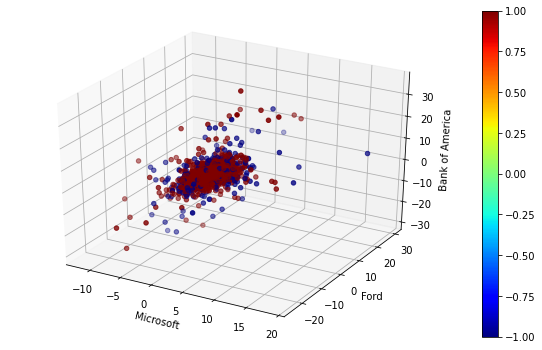

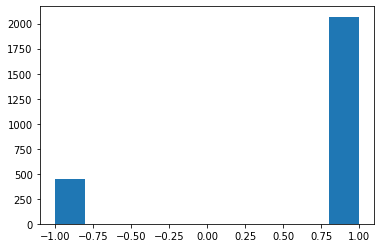

,label,frequency
0,-1,448
1,1,2069


Percentage of dataset objects classified as outliers = 17.80


In [6]:
#Question 5.
#Using an one-class SVM classifier for outlier detection in stocks dataset.
import pandas as pd
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

# Load CSV file, set the 'Date' values as the index of each row.
stocks = pd.read_csv('stocks.csv', header='infer') 
stocks.index = stocks['Date']
stocks = stocks.drop(['Date'],axis=1)
display(stocks)

N,d = stocks.shape
# Compute delta, which denotes the percentage of changes in the daily closing price of each stock
delta = pd.DataFrame(100*np.divide(stocks.iloc[1:,:].values-stocks.iloc[:N-1,:].values, stocks.iloc[:N-1,:].values),
                    columns=stocks.columns, index=stocks.iloc[1:].index)
display(delta)

#One-class SVM classifier.
ee = OneClassSVM(nu=0.01,gamma='auto')
yhat = ee.fit_predict(delta) # Perform fit on input data and returns labels for that input data.
display(yhat) # Print labels: -1 for outliers and 1 for inliers.

# Plot 3D scatterplot of outlier scores
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(delta.MSFT,delta.F,delta.BAC,c=yhat,cmap='jet')
ax.set_xlabel('Microsoft')
ax.set_ylabel('Ford')
ax.set_zlabel('Bank of America')
fig.colorbar(p)
plt.show()

#historgram and the frequencies of outlier and inlier labels.

plt.hist(yhat)
plt.show()

label_arr, frequency_arr = np.unique(yhat, return_counts=True)
df_hist = pd.DataFrame({'label': label_arr, 'frequency': frequency_arr})
display(df_hist)


#Percentage of outliers
yhat = pd.DataFrame(yhat)
freq = yhat.value_counts()
perc_outlier = (freq[-1] / yhat.shape[0]) * 100
print('Percentage of dataset objects classified as outliers = %.2f' %perc_outlier.values)

In [ ]:
#Question 6.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance
from scipy.stats import zscore

#read the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)
df.columns = ['crime','zoned','industry','charles river','nitric oxide','avg rooms','age','distance','radial highway','tax','PTratio','B','lstat','median value']
display(df)

#keeping the original dataset as it is and working on a copy.
#normalization using z-score
df_norm = df.copy()
df_norm.drop(['median value'],axis=1,inplace=True)  #only input attributes are normalized.
df_norm = (df_norm - df_norm.mean())/df_norm.std()
display(df_norm)

#PCA dimensionality reduction (PCA should only be applied on input attributes)
pca = PCA(n_components=2)
pComponents = pca.fit_transform(df_norm)
df_pca = pd.DataFrame(data=pComponents, columns=['PC1','PC2'])
display(df_pca)

#Outlier detection using KNN approach where k=2
knn = NearestNeighbors(n_neighbors=2,metric=distance.euclidean)
knn.fit(df_pca.values)
distances, indices = knn.kneighbors(df_pca.values)

outlier_score = distances[:,1]

#Scatterplot of two components with each object color coded using outlier score.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
p = ax.scatter(df_pca.PC1,df_pca.PC2,c=outlier_score,cmap='jet')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
fig.colorbar(p)
plt.show()